In [1]:
# Подключаем библиотеки
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
import math
import pylab 
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Читаем данные из файла
df = pd.read_excel("https://github.com/junaart/ForStudents/blob/master/Big_Data/Zachet/DataSets/3.xlsx?raw=true")

# Отображаем данные
display(df)

,town1,Avg-Avg-Р11,Avg-Avg-Р12,Avg-Avg-Р13,Avg-Avg-Р14,Avg-Avg-Р15,Avg-Avg-Р16,Avg-Avg-Р21,Avg-Avg-Р22,Avg-Avg-Р23,Avg-Avg-Р24,Avg-Avg-Р3
0,Абакан,18.250000,22.250000,704.250000,197.500000,19.500000,17.500000,16.000000,20.500000,87.250000,221.750000,27.446750
1,Азовский район,0.000000,1.000000,8.333333,1.666667,0.000000,0.000000,0.000000,1.000000,20.000000,92.000000,0.819667
2,Аксайский район,1.000000,0.250000,129.750000,18.000000,0.000000,15.500000,0.000000,0.000000,127.250000,2277.750000,9.550500
3,Алексеевкий район,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Анапа,0.000000,0.000000,31.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,208.500000,2.921500
...,...,...,...,...,...,...,...,...,...,...,...,...
276,Южно-Сахалинск,8.350000,6.750000,51.200000,15.500000,0.750000,0.450000,172.750000,8.700000,11.750000,448.350000,9.085250
277,Якутск,21.150000,27.100000,316.833333,105.166667,1.400000,2.333333,420.666667,550.400000,793.533333,1505.300000,37.549617
278,Ялта,4.833333,7.333333,222.166667,26.333333,0.000000,0.333333,436.833333,127.833333,884.333333,1906.000000,12.115167
279,Ярославль,30.440476,33.821429,407.476190,12.785714,0.321429,1.571429,108.226190,138.428571,38.535714,949.666667,26.777869


# Первый Блок

In [2]:
# По одному из выбранных вами количественных признаков выполнить расчет мер центральной тендекции: среднего арифметического, гармонического, геометрического, медианы.
col1=df["Avg-Avg-Р13"]
display(col1)
print("Среднее арифметическое:", col1.mean())
print("Среднее гармоническое:", stats.hmean(col1))
print("Среднее геометрическое:", stats.gmean(col1))
print("Медианное значение:", col1.median())

0      704.250000
1        8.333333
2      129.750000
3        0.000000
4       31.000000
          ...    
276     51.200000
277    316.833333
278    222.166667
279    407.476190
280     15.666667
Name: Avg-Avg-Р13, Length: 281, dtype: float64

Среднее арифметическое: 243.8267639842366
Среднее гармоническое: 0.0
Среднее геометрическое: 0.0
Медианное значение: 104.5


In [3]:
# Выполнить расчет значений 1, 3 квартилей для выбранного в п.1 признака.
Q1=col1.quantile(.25)
Q3=col1.quantile(.75)
print("Первый квартиль:", Q1)
print("Третий квартиль:", Q3)

Первый квартиль: 22.666666666666668
Третий квартиль: 360.79545454545456


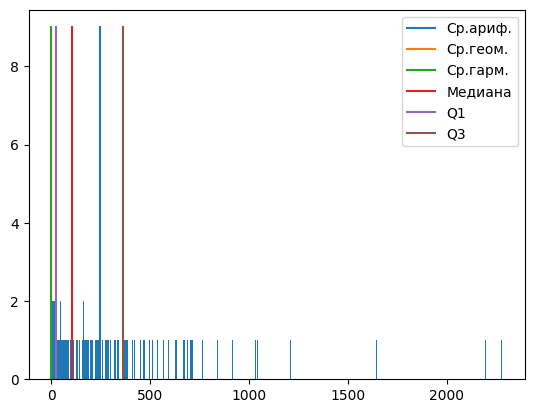

In [4]:
# Построить по выбранному в п.1 признаку гистограмму частот, отметив на ней все рассчитанные меры центральной тенденции и квартили.
count=Counter(col1)

y=[count[i] for i in col1]
plt.bar(col1,y,width=3)

x_mean = [col1.mean() for i in range(10)]
y_mean = [i for i in range(10)]
plt.plot(x_mean,y_mean,label="Ср.ариф.")

x_gmean=[stats.gmean(col1) for i in range(10)]
y_gmean=[i for i in range(10)]
plt.plot(x_gmean,y_gmean,label="Ср.геом.")

x_hmean=[stats.hmean(col1) for i in range(10)]
y_hmean=[i for i in range(10)]
plt.plot(x_gmean,y_gmean,label="Ср.гарм.")

x_med=[col1.median() for i in range(10)]
y_med=[i for i in range(10)]
plt.plot(x_med,y_med,label="Медиана")

x_q = [col1.quantile(.25) for i in range(10)]
y_q = [i for i in range(10)]
plt.plot(x_q,y_q,label="Q1")

x_q = [col1.quantile(.75) for i in range(10)]
y_q = [i for i in range(10)]
plt.plot(x_q,y_q,label="Q3")
plt.legend()

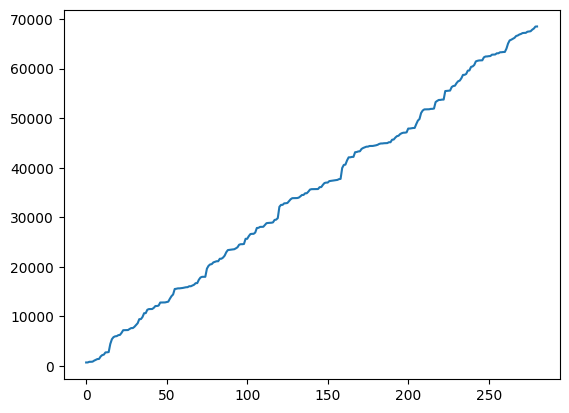

In [5]:
# По выбранному в п.1 показателю построить огиву.
plt.plot(col1.cumsum())
plt.show()

,Интервалы,Среднее арифметическое,Медиана,Мода
0,2051 - 2278,2237.750000,2237.750000,2278.500000
1,1823 - 2050,NaN,NaN,0.000000
2,1595 - 1822,1668.547222,1645.208333,1637.916667
3,1368 - 1594,NaN,NaN,0.000000
4,1140 - 1367,1256.402778,1256.402778,1210.416667
5,912 - 1139,997.524421,996.171875,959.000000
6,684 - 911,736.538620,714.901515,704.250000
7,456 - 683,560.894650,532.551587,499.375000
8,228 - 455,345.696486,358.250000,279.416667
9,0 - 227,66.525848,46.312500,0.000000


,mean,grmean,median,grmed,grmod
0,243.826764,56.013381,104.5,171.47043,129.913846


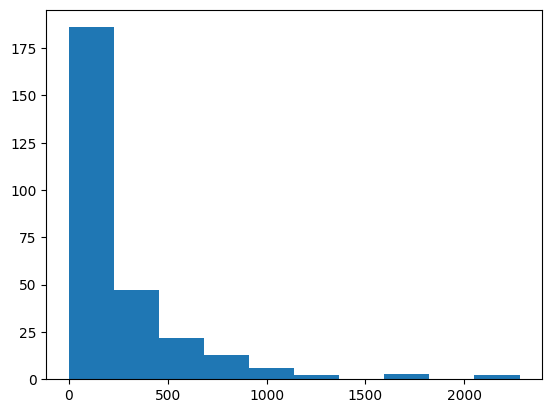

In [6]:
# Выполнить группировку значений показателя, рассчитать среднее арифметическое, медиану и моду по сгруппированным данным, сравнить полученные значения с значениями, полученными по несгруппированным данным.
p=plt.hist(col1)
group1=[list(p[0]),list(p[1])]
arr=[0]*len(p[1])
for i in range(len(p[1])-1):
    arr[i]=str(math.ceil(p[1][i]))+' - '+str(math.floor(p[1][i+1]))
pd.Series(p[0].astype('int'), index=arr[:-1])
group_value = pd.DataFrame(columns = ["Интервалы","Среднее арифметическое", "Медиана", "Мода"])
data_group=[]
for i in range(len(group1[0])):
    data_group.append(df[(group1[1][i]<=col1) & (col1<=group1[1][i + 1])]["Avg-Avg-Р13"])
    Avg_in = data_group[i].mean()
    Med_in = data_group[i].median()
    Mod_in = data_group[i].value_counts().idxmax() if (len(data_group[i]) != 0) else 0
    group_value = pd.concat([pd.DataFrame([[arr[i],Avg_in, Med_in, Mod_in]], columns=group_value.columns), group_value], ignore_index=True)
display(group_value)

grmean=(group_value["Среднее арифметическое"]*p[0][i]).sum()/p[0].sum()
grmed=p[1][0]+(math.floor(p[1][1])-math.ceil(p[1][0]))*((p[0].sum()/2)-0)/p[0][0]
grmod=p[1][0]+(math.floor(p[1][1])-math.ceil(p[1][0]))*((max(p[0])-0)/(2*max(p[0])-0-p[0][1]))
display(pd.DataFrame([[col1.mean(),grmean,col1.median(),grmed,grmod]],columns=['mean','grmean','median','grmed','grmod']))

In [7]:
# Рассчитать по выбранному в п.1 показателю меры изменчивости данных: размах вариации, среднее квадратическое отклонение, дисперсию, коэффициент вариации, среднее линейное отклонение, интерквартильный размах, коэффициент осцилляции, относительное линейное отклонение.
print("Размах вариации:", col1.max() - col1.min())
print("Среднее квадратическое отклонение:", col1.std())
print("Дисперсия:", col1.var())
print("Коэффициент вариации:", col1.std()/col1.mean()*100)
print("Среднее линейное отклонение:", (abs(col1 - col1.mean())).sum()/len(col1))
print("Интерквартильный размах:", col1.quantile(.75) - col1.quantile(.25))
print("Коэффициент осцилляции:", (col1.max() - col1.min())/col1.mean()*100)
print("Относительное линейное отклонение:", ((abs(col1 - col1.mean())).sum()/len(col1))/col1.mean()*100)

Размах вариации: 2278.5
Среднее квадратическое отклонение: 339.99286886810813
Дисперсия: 115595.15088116658
Коэффициент вариации: 139.4403400645914
Среднее линейное отклонение: 234.847869387281
Интерквартильный размах: 338.1287878787879
Коэффициент осцилляции: 934.4749373564687
Относительное линейное отклонение: 96.31751065788


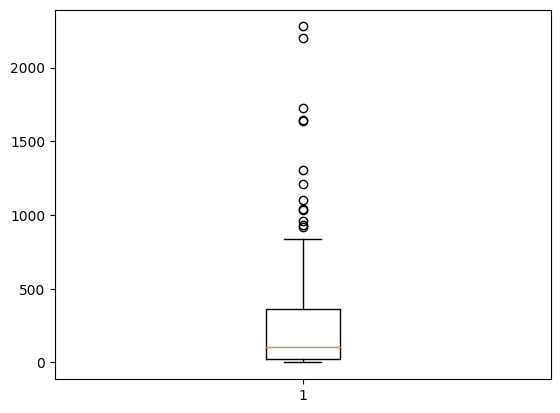

Моментный коэффициент асимметрии столбца равен: 2.74953164424715
Распределение скошено вправо.
Ассиметрия существенная.
Коэффициент эксцесса столбца равен: 10.233512962944772
Распределение островершинно.


In [8]:
# По выбранному в п.1 признаку построить коробку с усами, рассчитать показатели ассиметрии и эксцесса. Сделать выводы об ассиметрии распределения, степени остро или плосковершинности.
plt.boxplot(col1)
plt.show()

def rate_koeff_assim(ka):
    if (ka == 0):
        print("Распределение нормальное.")
    if (ka < 0):
        print("Распределение скошено влево.")
    if (ka > 0):
        print("Распределение скошено вправо.")
    if ((ka < 0) or (ka > 0)):
        if (abs(ka) < 0.25):
            print("Ассиметрия незначительная.")
        elif (abs(ka) < 0.5):
            print("Ассиметрия умеренная.")
        else:
            print("Ассиметрия существенная.")

def rate_koeff_eksc(ke):
    if (ke == 0):
        print("Распределение нормальное.")
    if (ke < 0):
        print("Распределение плосковершинно.")
    if (ke > 0):
        print("Распределение островершинно.")


ka = (((col1-col1.mean())**3).sum()/len(col1))/(col1.std()**3)
print("Моментный коэффициент асимметрии столбца равен:", ka)
rate_koeff_assim(ka)
ke = (((((col1-col1.mean())**4).sum()/len(col1))/(col1.std()**4))-3)
print("Коэффициент эксцесса столбца равен:", ke)
rate_koeff_eksc(ke)

# Второй Блок

,Интервалы,Внутрення средняя,Внутренняя дисперсия,Частота
0,19899 - 22110,519.125000,NaN,1
1,17688 - 19899,NaN,NaN,0
2,15477 - 17688,NaN,NaN,0
3,13266 - 15477,141.750000,NaN,1
4,11055 - 13266,184.833333,NaN,1
5,8844 - 11055,NaN,NaN,0
6,6633 - 8844,593.083333,NaN,1
7,4422 - 6633,190.253968,64263.970270,2
8,2211 - 4422,270.769444,122407.306551,3
9,0 - 2211,242.219532,117480.716092,272


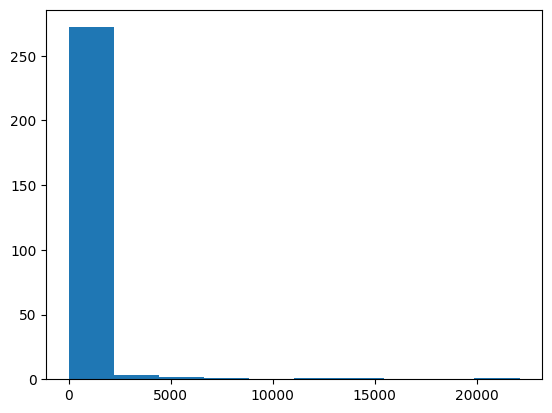

In [9]:
# Выполнить группировку другого количественного признака из датасета по группам признака, выбранного в первом блоке.
col2=df["Avg-Avg-Р22"]
p2=plt.hist(col2)
group2=[list(p2[0]),list(p2[1])]
arr=[0]*len(p2[1])
for i in range(len(p2[1])-1):
    arr[i]=str(math.ceil(p2[1][i]))+' - '+str(math.floor(p2[1][i+1]))
pd.Series(p2[0].astype('int'), index=arr[:-1])
group_value = pd.DataFrame(columns = ["Интервалы","Внутрення средняя", "Внутренняя дисперсия", "Частота"])
data_group=[]
for i in range(len(group2[0])):
    data_group.append(df[(group2[1][i]<=col2) & (col2<=group2[1][i + 1])]["Avg-Avg-Р13"])
    Avg_in = data_group[i].mean()
    D_in=data_group[i].var()
    group_value = pd.concat([pd.DataFrame([[arr[i],Avg_in, D_in, len(data_group[i])]], columns=group_value.columns), group_value], ignore_index=True)
display(group_value)

In [10]:
# В полученной группировке выполнить расчет эмпирического корреляционного отношения, сделать выводы о зависимости двух количественных признаков.
D_in_avg = (group_value['Внутренняя дисперсия']*group_value['Частота']).sum()/group_value['Частота'].sum()
D = col2.var()
cor_relation = math.sqrt(1 - D_in_avg/D)
print(cor_relation)

0.982702371486415


Эмпирический коэффициент корреляции 0.8 и более, что свидетельствует о сильной связи двух параметров.

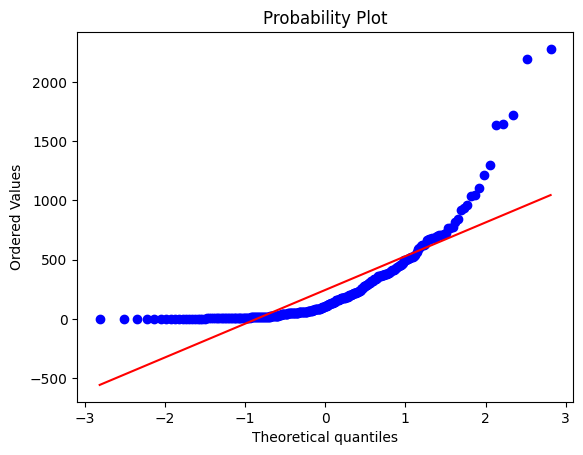

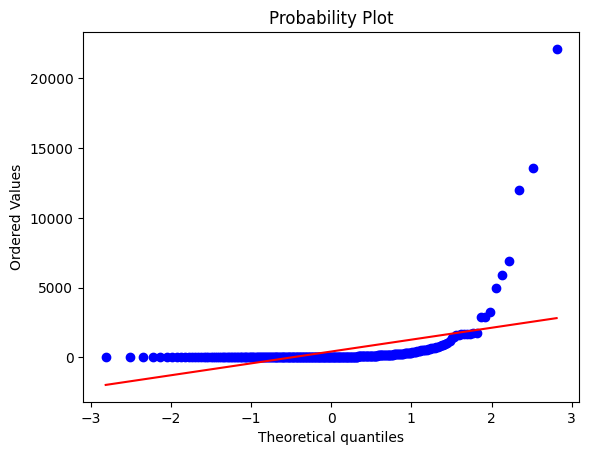

In [11]:
# Оценить близость распределения выбранных количественных признаков к нормальному распределению, построив диаграмму квантиль-квантиль. 
stats.probplot(col1, dist="norm", plot=pylab)
pylab.show()
stats.probplot(col2, dist="norm", plot=pylab)
pylab.show()

In [12]:
# Рассчитать линейный коэффициент корреляции между выбранными количественными показателями, оценить его значимость, сделать выводы.
cov = (col1*col2).mean()-col1.mean()*col2.mean()
norm = col1.std()*col2.std()
PirsonCorr = cov/norm
print('Коэф. кор. Пирсона = ', PirsonCorr)

Коэф. кор. Пирсона =  0.08196943359100853


Полученный коэффициент корреляции говорит о наличии прямой статистической связи между переменными. Сильная связь.

In [13]:
# Выполнить расчет частного коэффициента корреляции между выбранными количественными показателями с исключением влияния других количественных признаков датасета.
def matrix_minor(arr, i, j):
    return np.delete(np.delete(arr,i,axis=0), j, axis=1)
def r_partial(arr, i,j):
    aij=(-1)**(i+j)*np.linalg.det(matrix_minor(np.array(arr), i,j))
    aii=np.linalg.det(matrix_minor(np.array(arr), i,i))
    ajj=np.linalg.det(matrix_minor(np.array(arr), j,j))
    return -aij/math.sqrt(aii*ajj)
def corr_partial(arr):
    res=np.copy(arr)
    for i in range(np.shape(arr)[0]):
        for j in range(np.shape(arr)[0]):
            if i!=j:
                res[i,j]=r_partial(arr, i,j)
            else:
                res[i,j]=-r_partial(arr, i,j)
    res=pd.DataFrame(res)
    res.index=arr.index;res.columns=arr.columns
    return res
MyData=pd.DataFrame({'1':col1,'2':col2}).corr()
display(corr_partial(MyData).iloc[1,0])

0.08226218156811928

In [14]:
# Выполнить расчет ранговых коэффициентов корреляции Спирмена и Кендалла для двух выбранных количественных показателей, оценить их значимость.
MyData=pd.DataFrame({"Avg-Avg-Р13":col1,
                  "Avg-Avg-Р22":col2
                  })
corr = MyData.corr("spearman")
display(corr.style.background_gradient(cmap='plasma'))
corr = MyData.corr("kendall")
display(corr.style.background_gradient(cmap='plasma'))

,Avg-Avg-Р13,Avg-Avg-Р22
Avg-Avg-Р13,1.000000,0.734785
Avg-Avg-Р22,0.734785,1.000000


,Avg-Avg-Р13,Avg-Avg-Р22
Avg-Avg-Р13,1.000000,0.540643
Avg-Avg-Р22,0.540643,1.000000


# Третий Блок

In [15]:
# Выполнить нормирование всех количественных показателей приведя их к шкале от 0 до 100.
data = df.select_dtypes(['float','int']).iloc[:,0:]
func = lambda x : (x-x.min())/(x.max()-x.min())*100
datanorm = data.apply(func=func,axis='index')
display(datanorm)

,Avg-Avg-Р11,Avg-Avg-Р12,Avg-Avg-Р13,Avg-Avg-Р14,Avg-Avg-Р15,Avg-Avg-Р16,Avg-Avg-Р21,Avg-Avg-Р22,Avg-Avg-Р23,Avg-Avg-Р24,Avg-Avg-Р3
0,2.727273,2.964526,30.908492,5.414668,29.213483,5.902439,0.073338,0.092718,0.183628,0.773074,1.678452
1,0.000000,0.133237,0.365738,0.045693,0.000000,0.000000,0.000000,0.004523,0.042092,0.320734,0.050125
2,0.149440,0.033309,5.694536,0.493489,0.000000,5.227875,0.000000,0.000000,0.267813,7.940787,0.584042
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,1.360544,0.000000,0.000000,0.505923,0.000000,0.000000,0.000000,0.726881,0.178659
...,...,...,...,...,...,...,...,...,...,...,...
276,1.247821,0.899350,2.247092,0.424949,1.123596,0.151777,0.791823,0.039349,0.024729,1.563057,0.555591
277,3.160648,3.610726,13.905347,2.883253,2.097378,0.786992,1.928182,2.489371,1.670087,5.247840,2.296273
278,0.722291,0.977072,9.750567,0.721956,0.000000,0.112427,2.002284,0.578170,1.861186,6.644777,0.740879
279,4.549013,4.506269,17.883528,0.350534,0.481541,0.530015,0.496069,0.626090,0.081103,3.310768,1.637548


In [16]:
# Построить корреляционную матрицу (с использованием цветовой гаммы) по всем нормированным показателям датасета.
corr = datanorm.corr()
corr.style.background_gradient(cmap='plasma')

,Avg-Avg-Р11,Avg-Avg-Р12,Avg-Avg-Р13,Avg-Avg-Р14,Avg-Avg-Р15,Avg-Avg-Р16,Avg-Avg-Р21,Avg-Avg-Р22,Avg-Avg-Р23,Avg-Avg-Р24,Avg-Avg-Р3
Avg-Avg-Р11,1.000000,0.928266,0.228330,0.160079,0.070376,0.143905,0.596698,0.743286,0.150147,0.409557,0.866547
Avg-Avg-Р12,0.928266,1.000000,0.345510,0.284772,0.135702,0.153943,0.571445,0.780917,0.149595,0.420919,0.936962
Avg-Avg-Р13,0.228330,0.345510,1.000000,0.678347,0.390022,0.288028,0.041594,0.082262,0.090071,0.576295,0.227529
Avg-Avg-Р14,0.160079,0.284772,0.678347,1.000000,0.227782,0.166796,0.024733,0.039287,0.111199,0.458990,0.162474
Avg-Avg-Р15,0.070376,0.135702,0.390022,0.227782,1.000000,0.414383,-0.010521,0.006310,0.050444,0.253535,0.053463
Avg-Avg-Р16,0.143905,0.153943,0.288028,0.166796,0.414383,1.000000,0.055489,0.058149,0.039359,0.236296,0.061947
Avg-Avg-Р21,0.596698,0.571445,0.041594,0.024733,-0.010521,0.055489,1.000000,0.894323,0.296510,0.506541,0.611046
Avg-Avg-Р22,0.743286,0.780917,0.082262,0.039287,0.006310,0.058149,0.894323,1.000000,0.264241,0.432917,0.832167
Avg-Avg-Р23,0.150147,0.149595,0.090071,0.111199,0.050444,0.039359,0.296510,0.264241,1.000000,0.158398,0.180065
Avg-Avg-Р24,0.409557,0.420919,0.576295,0.458990,0.253535,0.236296,0.506541,0.432917,0.158398,1.000000,0.361100


In [17]:
# Построить корреляционную матрицу (с использованием цветовой гаммы) по всем ненормированным показателям датасета.
corr2 = df.corr()
corr2.style.background_gradient(cmap='plasma')

/tmp/ipykernel_9961/1945309322.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df.corr()


,Avg-Avg-Р11,Avg-Avg-Р12,Avg-Avg-Р13,Avg-Avg-Р14,Avg-Avg-Р15,Avg-Avg-Р16,Avg-Avg-Р21,Avg-Avg-Р22,Avg-Avg-Р23,Avg-Avg-Р24,Avg-Avg-Р3
Avg-Avg-Р11,1.000000,0.928266,0.228330,0.160079,0.070376,0.143905,0.596698,0.743286,0.150147,0.409557,0.866547
Avg-Avg-Р12,0.928266,1.000000,0.345510,0.284772,0.135702,0.153943,0.571445,0.780917,0.149595,0.420919,0.936962
Avg-Avg-Р13,0.228330,0.345510,1.000000,0.678347,0.390022,0.288028,0.041594,0.082262,0.090071,0.576295,0.227529
Avg-Avg-Р14,0.160079,0.284772,0.678347,1.000000,0.227782,0.166796,0.024733,0.039287,0.111199,0.458990,0.162474
Avg-Avg-Р15,0.070376,0.135702,0.390022,0.227782,1.000000,0.414383,-0.010521,0.006310,0.050444,0.253535,0.053463
Avg-Avg-Р16,0.143905,0.153943,0.288028,0.166796,0.414383,1.000000,0.055489,0.058149,0.039359,0.236296,0.061947
Avg-Avg-Р21,0.596698,0.571445,0.041594,0.024733,-0.010521,0.055489,1.000000,0.894323,0.296510,0.506541,0.611046
Avg-Avg-Р22,0.743286,0.780917,0.082262,0.039287,0.006310,0.058149,0.894323,1.000000,0.264241,0.432917,0.832167
Avg-Avg-Р23,0.150147,0.149595,0.090071,0.111199,0.050444,0.039359,0.296510,0.264241,1.000000,0.158398,0.180065
Avg-Avg-Р24,0.409557,0.420919,0.576295,0.458990,0.253535,0.236296,0.506541,0.432917,0.158398,1.000000,0.361100


##### Провести сравнение результатов п.2 и п.3. 
Найдем разность значений корреляционных матриц для нормированных и не нормированных значений. 
Если разность существенная по абсолютному значению, значит для данных двух параметров существует иная корреляционная зависимость. Если разница не существенная, поставим значение 0.

In [18]:
func = (lambda x : (0 if abs(x)<10e-3 else x))
CorrR = corr-corr2
for col in CorrR.columns:
    s=CorrR[col]
    s=s.apply(func=func)
    CorrR[col]=s
CorrR.style.background_gradient(cmap='plasma')

,Avg-Avg-Р11,Avg-Avg-Р12,Avg-Avg-Р13,Avg-Avg-Р14,Avg-Avg-Р15,Avg-Avg-Р16,Avg-Avg-Р21,Avg-Avg-Р22,Avg-Avg-Р23,Avg-Avg-Р24,Avg-Avg-Р3
Avg-Avg-Р11,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р12,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р13,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р14,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р15,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р16,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р21,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р22,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р23,0,0,0,0,0,0,0,0,0,0,0
Avg-Avg-Р24,0,0,0,0,0,0,0,0,0,0,0


Как видно из матрицы,у нас нет существенных отклонений.

Объясняемая доля дисперсии [0.42674717 0.1975937 ]
Собственные значения [36.31907888 24.7136023 ]


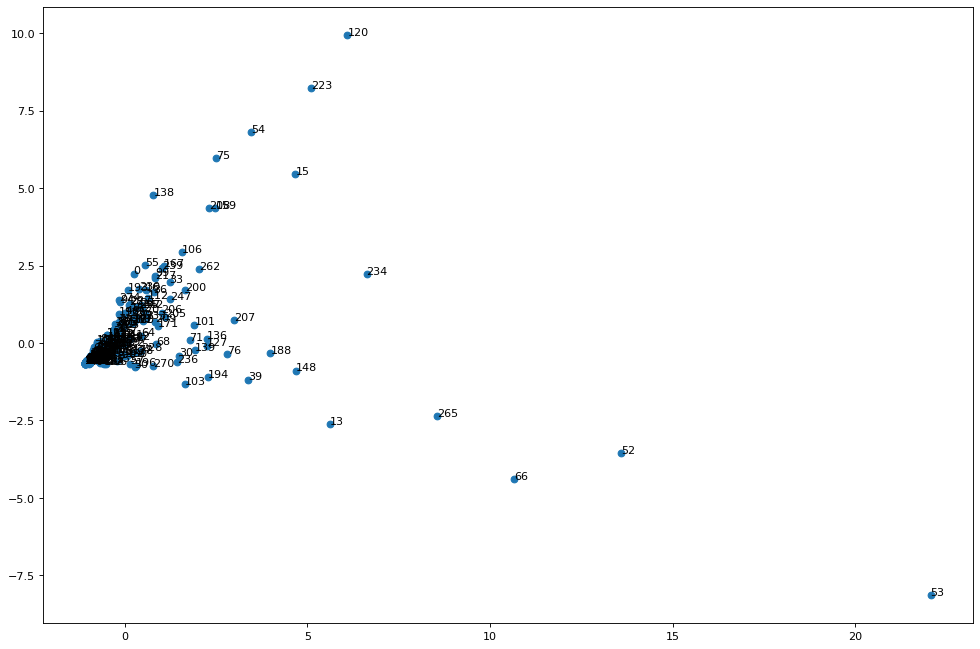

In [19]:
# С использованием компонентного анализа провести кластеризацию количественных показателей датасета.
D=df.iloc[:,1:]
scaler = preprocessing.StandardScaler().fit(D)
Ds = scaler.transform(D)
objPCA = PCA(n_components=2)
objPCA.fit(Ds)
print('Объясняемая доля дисперсии',objPCA.explained_variance_ratio_)
print('Собственные значения',objPCA.singular_values_)
Components = objPCA.fit_transform(Ds)
PrincipianComp = pd.DataFrame(data = Components, columns = ['component 1', 'component 2'])
plt.figure(figsize=(15,10), dpi = 80)
plt.scatter(PrincipianComp['component 1'],PrincipianComp['component 2'])
for i in range(len(PrincipianComp.index)):
    plt.annotate(D.index[i], (PrincipianComp['component 1'][i],PrincipianComp['component 2'][i]))

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
Avg-Avg-Р11,18.25000,0.000000,1.0000,0.0,0.0000,15.000000,24.238095,2.291667,0.000000,25.416667,...,2.500,0.00000,0.75000,6.583333,0.000,8.35000,21.150000,4.833333,30.440476,0.000000
Avg-Avg-Р12,22.25000,1.000000,0.2500,0.0,0.0000,26.750000,20.916667,5.250000,0.000000,36.416667,...,1.000,0.75000,4.50000,9.027778,1.000,6.75000,27.100000,7.333333,33.821429,0.000000
Avg-Avg-Р13,704.25000,8.333333,129.7500,0.0,31.0000,207.500000,159.547619,155.291667,20.000000,499.375000,...,177.000,36.00000,8.25000,227.500000,46.000,51.20000,316.833333,222.166667,407.476190,15.666667
Avg-Avg-Р14,197.50000,1.666667,18.0000,0.0,0.0000,24.875000,14.619048,27.375000,1.333333,266.958333,...,11.500,2.75000,0.00000,173.500000,0.000,15.50000,105.166667,26.333333,12.785714,0.000000
Avg-Avg-Р15,19.50000,0.000000,0.0000,0.0,0.0000,0.000000,0.000000,3.625000,0.000000,2.875000,...,0.000,0.00000,0.00000,17.166667,0.000,0.75000,1.400000,0.000000,0.321429,0.000000
Avg-Avg-Р16,17.50000,0.000000,15.5000,0.0,1.5000,0.000000,0.000000,0.500000,0.000000,6.000000,...,34.000,0.00000,0.00000,7.000000,0.000,0.45000,2.333333,0.333333,1.571429,1.000000
Avg-Avg-Р21,16.00000,0.000000,0.0000,0.0,0.0000,141.375000,883.797619,0.750000,0.000000,573.666667,...,3.500,0.00000,22.25000,8.666667,0.000,172.75000,420.666667,436.833333,108.226190,0.000000
Avg-Avg-Р22,20.50000,1.000000,0.0000,0.0,0.0000,106.750000,179.892857,3.625000,0.000000,523.083333,...,1.250,0.25000,6.00000,16.500000,0.000,8.70000,550.400000,127.833333,138.428571,0.000000
Avg-Avg-Р23,87.25000,20.000000,127.2500,0.0,0.0000,13.750000,267.333333,47.750000,10.666667,754.125000,...,597.500,85.25000,0.00000,377.166667,0.000,11.75000,793.533333,884.333333,38.535714,0.000000
Avg-Avg-Р24,221.75000,92.000000,2277.7500,0.0,208.5000,1886.625000,2968.357143,140.416667,20.666667,1942.458333,...,5341.500,500.75000,118.25000,1989.611111,255.000,448.35000,1505.300000,1906.000000,949.666667,168.000000


Объясняемая доля дисперсии [0.77900193 0.10051616]
Собственные значения [48.54359714 17.43735591]


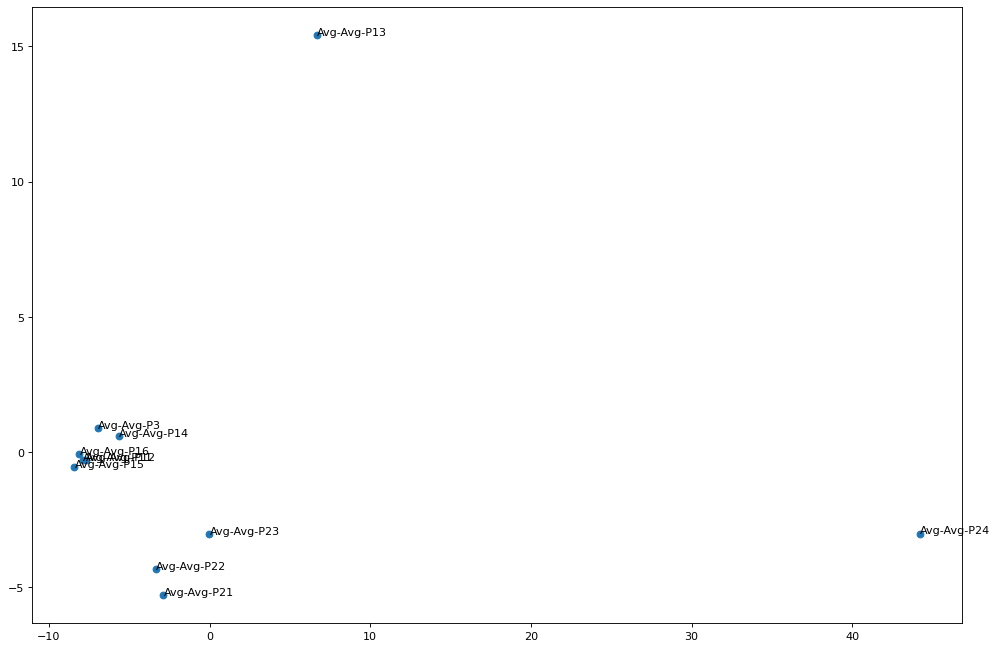

In [20]:
# С использованием компонентного анализа провести кластеризацию объектов анализа датасета.
D=df.iloc[:,1:]
Ds = np.transpose(D)
display(Ds)
scaler = preprocessing.StandardScaler().fit(Ds)
Ts = scaler.transform(Ds)
objPCA = PCA(n_components=2)
objPCA.fit(Ts)
print('Объясняемая доля дисперсии',objPCA.explained_variance_ratio_)
print('Собственные значения',objPCA.singular_values_)
Components = objPCA.fit_transform(Ts)
PrincipianComp = pd.DataFrame(data = Components, columns = ['component 1', 'component 2'])
plt.figure(figsize=(15,10), dpi = 80)
plt.scatter(PrincipianComp['component 1'],PrincipianComp['component 2'])
for i in range(len(PrincipianComp.index)):
    plt.annotate(Ds.index[i], (PrincipianComp['component 1'][i],PrincipianComp['component 2'][i]))